In [1]:
import networkx as nx

In [49]:
G = nx.DiGraph()

In [7]:
ls

cmp.py  connections.txt  Untitled.ipynb


In [84]:
def create_graph_form_file(filename):
    G = nx.DiGraph()
    process_weights = True
    with open(filename) as f:
        for line in f:
            if line == '\n':
                process_weights = False
            elif process_weights:
                node, weight = line.strip().split(' ')
                print(node, weight)
                G.add_node(node, weight=weight)
            else:
                node1, node2 = line.strip().replace(' ', '').split('->')
                G.add_edge(node1, node2)
    return G

In [85]:
G = create_graph_form_file("./connections.txt")

Z1 5
Z2 3
Z3 4
Z4 2
Z5 1


In [91]:
G.nodes["Z1"]["weight"]

'5'

In [88]:
G.edges

OutEdgeView([('Z1', 'Z2'), ('Z1', 'Z4'), ('Z2', 'Z5'), ('Z3', 'Z4'), ('Z3', 'Z5')])

In [95]:
for node in G.edges():
    print(node)

('Z1', 'Z2')
('Z1', 'Z4')
('Z2', 'Z5')
('Z3', 'Z4')
('Z3', 'Z5')


In [96]:
import matplotlib.pyplot as plt

In [97]:
pos = nx.spring_layout(G)

In [98]:
pos

{'Z1': array([0.10014601, 0.18706679]),
 'Z2': array([-0.76798115, -0.2994278 ]),
 'Z3': array([0.23682726, 0.02190567]),
 'Z4': array([1.        , 0.61479981]),
 'Z5': array([-0.56899212, -0.52434447])}

{'Z1': Text(0.100146009737837, 0.18706679403993426, 'Z1'),
 'Z2': Text(-0.7679811509073696, -0.2994278004671136, 'Z2'),
 'Z3': Text(0.2368272602949057, 0.0219056671942652, 'Z3'),
 'Z4': Text(1.0, 0.6147998089633959, 'Z4'),
 'Z5': Text(-0.5689921191253728, -0.5243444697304819, 'Z5')}

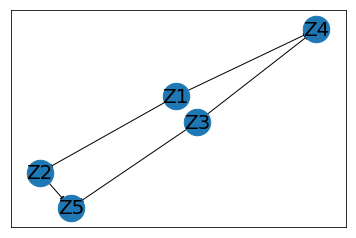

In [101]:
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

In [103]:
import matplotlib as mpl

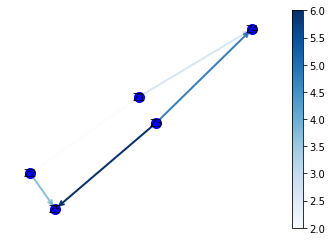

In [114]:
node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    
pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()

In [116]:
print(G)

In [150]:
G.add_node("Z9", weight=12)

In [151]:
G.node

NodeView(('Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'Z9'))

In [37]:
G.add_node(1, time='5pm')

In [43]:
G.nodes['Z2']

KeyError: 'Z2'

In [50]:
G.add_nodes_from([('Z1', {'weight': 3}), ('Z2', {'weight': 5}), ('Z3', {'weight': 1})])

In [162]:
G.nodes['Z2']['weight'] 

4

In [52]:
G.add_edges_from([('Z1', 'Z2'), ('Z1', 'Z3'), ('Z2', 'Z3')])

In [154]:
for node in G.nodes():
    print(G.nodes['Z9'])
#     G.nodes['Z9']['lala'] = 1

{'weight': 12, 'lala': 1}
{'weight': 12, 'lala': 1}
{'weight': 12, 'lala': 1}
{'weight': 12, 'lala': 1}
{'weight': 12, 'lala': 1}
{'weight': 12, 'lala': 1}


In [140]:
G.edges

OutEdgeView([('Z1', 'Z2'), ('Z1', 'Z4'), ('Z2', 'Z5'), ('Z3', 'Z4'), ('Z3', 'Z5')])

In [57]:
nx.write_yaml(G, 'g.yaml')

In [58]:
G_yaml = nx.read_yaml('g.yaml')

In [63]:
G_yaml.edges

OutEdgeView([('Z1', 'Z2'), ('Z1', 'Z3'), ('Z2', 'Z3')])

In [64]:
from networkx.readwrite import json_graph

In [65]:
data1 = json_graph.node_link_data(G)

In [66]:
data2 = json_graph.node_link_data(G, {'link': 'edges', 'source': 'from', 'target': 'to'})

In [68]:
import json

In [69]:
s1 = json.dumps(data1)

In [70]:
s2 = json.dumps(data2, default={'link': 'edges', 'source': 'from', 'target': 'to'})

In [71]:
s1

'{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"weight": 3, "id": "Z1"}, {"weight": 5, "id": "Z2"}, {"weight": 1, "id": "Z3"}], "links": [{"source": "Z1", "target": "Z2"}, {"source": "Z1", "target": "Z3"}, {"source": "Z2", "target": "Z3"}]}'

In [72]:
with open('g1.json', 'w') as outfile:
    json.dump(s1, outfile)

In [73]:
with open('g2.json', 'w') as outfile:
    json.dump(s2, outfile)

In [80]:
with open('g2.json', 'r') as f:
    json
    G1 = json.loads()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [117]:
plt.style.available

['seaborn-notebook',
 'seaborn-dark',
 'tableau-colorblind10',
 'seaborn-muted',
 'dark_background',
 'grayscale',
 'seaborn-deep',
 'seaborn-paper',
 'seaborn',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-white',
 'seaborn-poster',
 'fast',
 'Solarize_Light2',
 'bmh',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'classic',
 'seaborn-talk',
 '_classic_test',
 'ggplot',
 'seaborn-pastel']

In [138]:
list(G.nodes())[-1]

'Z5'

In [130]:
for node in G.predecessors("Z2"):
    print(node)

Z1


In [133]:
for node in nx.neighbors(G, "Z1"):
    print(node)

Z2
Z4


In [135]:
for node in G.successors("Z2"):
    print(node)

Z5


In [136]:
len(list(G.successors("Z2")))

1

In [157]:
for node in nx.topological_sort(G):
    print(node)

Z9
Z3
Z1
Z4
Z2
Z5


In [158]:
list(nx.topological_sort(G))

['Z9', 'Z3', 'Z1', 'Z4', 'Z2', 'Z5']